# Part II - (Characteristics of Loanstatus)
## by (Israel Joseph)

## Investigation Overview

In this analysis process, i would be looking into the characteristics of loan status ( default and Non-default) and how they behave among other features like Term, Occupation, DebtToIncomeRatio, BorrowerRate, Listing_category, Listing_category, ProsperRating, ProsperScore  and IsBorrowerHomeowner

## Dataset Overview

 The main data set contains 113,937 loans with 81 variables but the data that we would be working with contains 50650 loans   and 14 variables that includes; ListingNumber, Term, Occupation, DebtToIncomeRatio, BorrowerRate, Listing_category, Listing_category, ProsperRating, ProsperScore IsBorrowerHomeowner, LoanOriginationDate EmploymentStatus, LoanOriginalAmount, 
IncomeRange and LoanStatus. about half of the data set were removed due to inconsistencies or missing information and also due to the fact the will be focusing on loanstatus that have defaulted those that havent so loans with the loanstatus of 'current'
was removed

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [3]:
# selecting the relevant columns needed for the analysis 
columns= ['ListingNumber', 'CreditGrade', 'Term',  'Occupation', 'BorrowerRate', 'DebtToIncomeRatio',
         'ListingCategory (numeric)', 'ProsperRating (Alpha)', 'ProsperScore', 'IsBorrowerHomeowner',  'LoanOriginationDate',
           'EmploymentStatus', 'LoanOriginalAmount', 'IncomeRange', 'LoanStatus']

In [4]:
# subsetting the data and storing into a new-variable using the list of features selected
loan = df[columns]

In [5]:
# copying the subset data and storing it into a new-variable to be ready for cleaning
loan_data = loan.copy()

In [6]:
# dropping the missing values of the selected features row-wise
loan_data.dropna(subset =['EmploymentStatus', 'Occupation', 'DebtToIncomeRatio'], inplace = True)
# dropping the 'CreditGrade' feature because it contains more than 50% null values
loan_data.drop(columns = 'CreditGrade', inplace = True )

In [7]:
# re-nameming some of the features in the data set
loan_data = loan_data.rename(columns = {'ListingCategory (numeric)': 'ListingCategory', 'ProsperRating (Alpha)': 'ProsperRating'})

In [8]:
#converting the 'LoanOriginationDate' column datatype into a pandas datetime object
loan_data['LoanOriginationDate'] = pd.to_datetime(loan_data['LoanOriginationDate'])

In [9]:
# subsetting the data to exclude any observation with 'Current' in the 'LoanStatus' column
loan_data = loan_data[loan_data['LoanStatus'] != 'Current']

In [10]:
# Changing the observations in the 'LoanStatus' column into 0 and 1
loan_data['LoanStatus'] = np.where(loan_data['LoanStatus'].isin(['Defaulted', 'Chargedoff', 'Cancelled',
                                                                   'Past Due (31-60 days)', 'Past Due (91-120 days)',
                                                                   'Past Due (>120 days)','Past Due (61-90 days)',
                                                                   'Past Due (1-15 days)',
                                                                   'FinalPaymentInProgress']),
                                                                   0, 1)

## The Distribution of the Loan Status feature.

The distribution of the loan status feature shows that borrowers that are Non-default(1) are much in numbers with about values greater than 30000 while those that defaulted(0) were below 20000

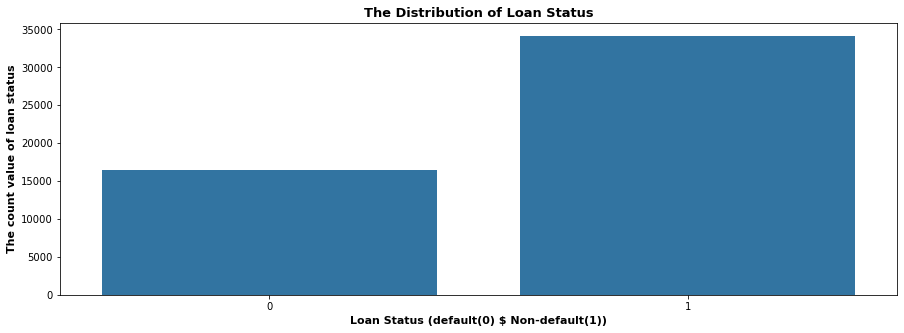

In [11]:
# setting a default color
base_color = sns.color_palette()[0]
# setting the fig size for ploting
plt.figure(figsize = [15, 5])
# ploting the function with seaborn countplot
sns.countplot(data=loan_data, x='LoanStatus', color= base_color)
# setting the y label
plt.ylabel('The count value of loan status', fontsize=11, weight=("bold"))
# setting the x label
plt.xlabel('Loan Status (default(0) $ Non-default(1))', fontsize=11, weight=("bold"))
# setting the plot title
plt.title('The Distribution of Loan Status', fontsize=13, weight=("bold"));

## The distribution of loan terms

The Term is the length of the loan expressed in months. It shows that 36 months (5 years) were more populated in the data with count above 40000

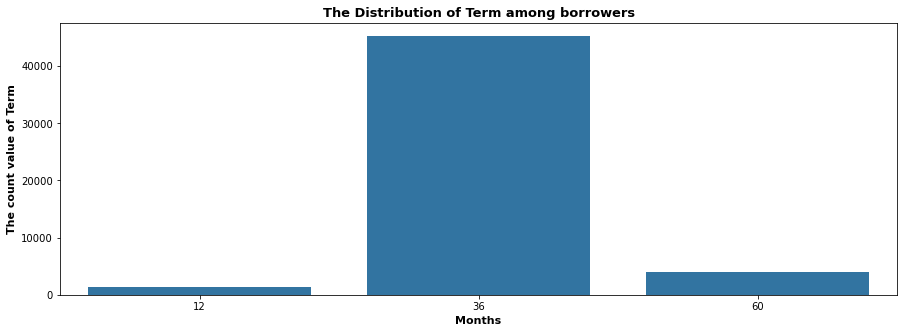

In [12]:
# setting a default color
base_color = sns.color_palette()[0]
# setting the fig size for ploting
plt.figure(figsize = [15, 5])
# ploting the function with seaborn countplot
sns.countplot(data=loan_data, x='Term', color= base_color)
# setting the y label
plt.ylabel('The count value of Term', fontsize=11, weight=("bold"))
# setting the x label
plt.xlabel('Months', fontsize=11, weight=("bold"))
# setting the plot title
plt.title('The Distribution of Term among borrowers', fontsize=13, weight=("bold"));

## The proper score distribution

Most of the borrowers a prosper score within 5 to 9 with 8 being the highest and suprisely those with the best prosper score (11) were very few and are below 500 

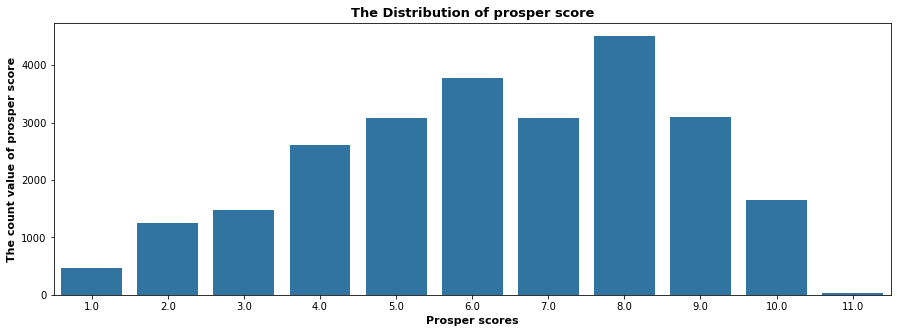

In [13]:
# setting a default color
base_color = sns.color_palette()[0]
# setting the fig size for ploting
plt.figure(figsize = [15, 5])
# ploting the function with seaborn countplot
sns.countplot(data=loan_data, x='ProsperScore', color= base_color)
# setting the y label
plt.ylabel('The count value of prosper score', fontsize=11, weight=("bold"))
# setting the x label
plt.xlabel('Prosper scores', fontsize=11, weight=("bold"))
# setting the plot title
plt.title('The Distribution of prosper score', fontsize=13, weight=("bold"));

## Relationship between loan status and loan term

There is a bit of meaningful interaction which shows that theirs a small amount of borrowers with term of 12 month(a year) that defaulted(0). The loan term of 36 months(5 years) for both those that have defaulted(0) and Non-default(1) are much populated or have a high value count, this is due to the fact that it is more populated in the data set as seen in the previous visual

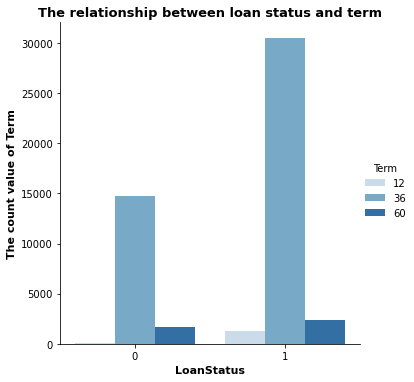

In [14]:
# plotting the 'LoanStatus' and "IsBorrowerHomeowner" with my function cat_plot()
sns.catplot(data=loan_data, kind="count", x='LoanStatus', hue="Term", palette = 'Blues')
# setting the labels and title
plt.xlabel('LoanStatus', fontsize=11, weight=("bold"))
plt.ylabel('The count value of Term', fontsize=11, weight=("bold"))
plt.title('The relationship between loan status and term',fontsize=13,weight=("bold"));

## The distribution of proper score and borrowers rate by loan status

* The proper score for those that are Non-defaulters(1) are more densely populated above the score of 8 which suggest that most borrowers with high proper score do not default.
* The borrower rate for those that defaults(0) are more densely populated below the rate of 0.15 which suggest that most borrowers with low borrower rate do not default.

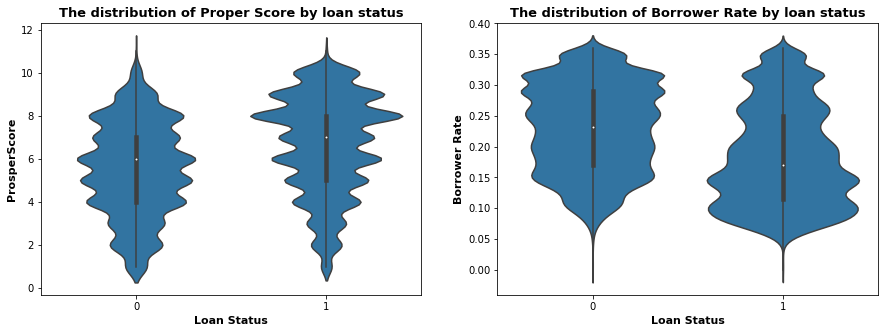

In [15]:
# ploting fig size
plt.figure(figsize=[15,5])
# stating the position of the plot
plt.subplot(1,2,1)
# setting a violin plot to show the distribution of 'LoanStatus' among 'ProsperScore'
sns.violinplot(data= loan_data, x='LoanStatus', y='ProsperScore', color=sns.color_palette()[0])
# setting the labels and title
plt.ylabel('ProsperScore', fontsize=11, weight=("bold"))
plt.xlabel('Loan Status', fontsize=11, weight=("bold"))
plt.title('The distribution of Proper Score by loan status', fontsize=13, weight=("bold"))

# stating the position of the plot
plt.subplot(1,2,2)
# setting a violin plot to show the distribution of 'LoanStatus' among 'BorrowerRate'
sns.violinplot(data= loan_data, x='LoanStatus', y='BorrowerRate', color=sns.color_palette()[0])
# setting the labels and title
plt.ylabel('Borrower Rate', fontsize=11, weight=("bold"))
plt.xlabel('Loan Status', fontsize=11, weight=("bold"))
plt.title('The distribution of Borrower Rate by loan status', fontsize=13, weight=("bold"));

## Relationship between borrower rate, prosper score amd loan status

The borrower rate for both the default(0) and Non-default(1) decreases progressively as the prosper score increases. This visual also shows that borrowers that default(0) have higher borrowers rate than those that are Non-default(1) as it decreases progressively.

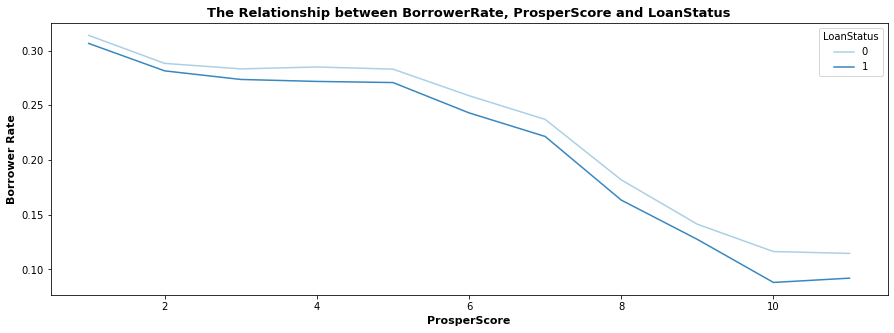

In [16]:
# ploting fig size
plt.figure(figsize = [15, 5])
# setting a line plot to show the Relationship between BorrowerRate, ProsperScore and LoanStatus
sns.lineplot(data=loan_data,  x='ProsperScore', y='BorrowerRate', hue='LoanStatus', palette = 'Blues', ci = None)
# setting the labels and title
plt.ylabel('Borrower Rate', fontsize=11, weight=("bold"))
plt.xlabel('ProsperScore', fontsize=11, weight=("bold"))
plt.title('The Relationship between BorrowerRate, ProsperScore and LoanStatus', fontsize=13, weight=("bold"));

## The average debt to income ratio relationship between income range and loan status

Well the debt income ratio (DTI) which is the percentage of a consumers(borrower) mothly gross income that goes toward paying depth. From the analysis, it shows that unemployed borrowers(Not employed) that have defaulted(0) had a very high debt to income ratio average above 4.5 which means non employed borrowers with high debt to income ratio would default

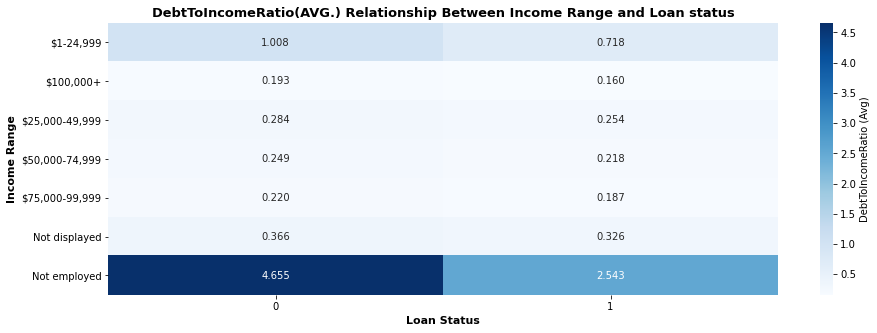

In [17]:
# using the group by statement to group the varaibles
group=loan_data.groupby(['IncomeRange', 'LoanStatus']).mean()['DebtToIncomeRatio']
# resetting the index
group=group.reset_index(name='DebtToIncomeRatio (Avg)')
#  making pivoted table
group=group.pivot(index = 'IncomeRange', columns = 'LoanStatus', values = 'DebtToIncomeRatio (Avg)')
plt.figure(figsize = [15, 5])
# drawing a heat map for the distribution
sns.heatmap(group,annot = True, fmt = '.3f',cbar_kws = {'label' : 'DebtToIncomeRatio (Avg)'}, cmap = 'Blues')
# setting the labels and title
plt.ylabel('Income Range', fontsize=11, weight=("bold"))
plt.xlabel('Loan Status', fontsize=11, weight=("bold"))
plt.title('DebtToIncomeRatio(AVG.) Relationship Between Income Range and Loan status', fontsize=13, weight=("bold"));

## Key insight for this presentation

From the analysis, the loan data had more borrowers that are Non-defaulters(1) than those that defaulted(0) and the data set reveals that the higher the prosper ratings the lower the borrowerRate, the borrower rate for both the default(0) and Non-default(1) decreases progressively as the prosper score increases but most importantly non employed borrowers with high debt to income ratio would default 

In [18]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 786895 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\DELL E6430\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\DELL E6430\anaconda3\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\DELL E6430\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\DELL E6430\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\DELL E6430\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_